In [6]:
# 0 - Primero instalo pandas
!pip install pandas

In [1]:
# 0 - Cargo las librerías que necesito para el ejercicio de ML

#from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline 

In [3]:
# 0 - También cargo la librería sklearn 
import sklearn
sklearn.__version__

'1.5.1'

In [7]:
# 1 - Ahora empezamos la preparación de datos 
# 1.1 - Cargamos el dataset de airbnb

airbnb = pd.read_csv("airbnb-listings-extract.csv", sep=";")
airbnb.head(4)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."


In [9]:
# 1.2 - A continuación se eliminan las columnas no relevantes para el estudio (IDs, URLs, etc). Primero listo las cabeceras para saber qué columnas eliminar

print(airbnb.columns)



Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [11]:
# 1.2 Eliminación de las columnas. 

airbnb = airbnb.drop(['ID','Listing Url','Scrape ID','Last Scraped','Space','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host About','Host Thumbnail Url','Host Picture Url','Host Verifications','Market','Smart Location','Country Code','Weekly Price','Monthly Price','Maximum Nights','Calendar Updated','Has Availability','First Review','Last Review','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','License','Jurisdiction Names','Name','Summary','Experiences Offered','Host Since','Host Location','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Neighbourhood Cleansed','Neighbourhood Group Cleansed','State','Latitude','Longitude','Calendar last Scraped','Cancellation Policy','Geolocation','Features','Calculated host listings count', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365'], axis=1)
airbnb.head(5).T

,0,1,2,3,4
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca..."
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Zipcode,78733,08010,08008,08009,08036
Country,United States,Spain,Spain,Spain,Spain
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0


In [13]:
# 1.3 - Nos quedamos sólo con las muestras que son de Madrid

airbnb_Madrid = airbnb[airbnb['City'] == "Madrid"]

airbnb_Madrid.head(5).T
print(airbnb_Madrid.shape)


(13207, 22)


In [45]:
# 1.4 Observando las características, vemos que sólo hay datos en 'Square Feet' en 314 filas, por lo que haremos un modelo con los datos que tienen esta característica informada
# Podríamos dividir el dataframe en 2, uno con Square Feet informado y otro no, con el resto de datos.
# En la anterior versión hemos supuesto los datos NaN con la media y no ha salido un buen modelo

airbnb_Madrid_sf = airbnb_Madrid[airbnb['Square Feet'] > 0]
print (airbnb_Madrid_sf.shape)

(314, 24)


C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\218165480.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airbnb_Madrid_sf = airbnb_Madrid[airbnb['Square Feet'] > 0]


In [57]:
# 1.4 Ahora hacemos la división entre train y test


from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_Madrid_sf, test_size=0.1, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./airbnb_Madrid_sf_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb_Madrid_sf_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_Madrid_sf_train = pd.read_csv('./airbnb_Madrid_sf_train.csv', sep=';', decimal='.')
airbnb_Madrid_sf_train.head(5).T

Dimensiones del dataset de training: (282, 24)
Dimensiones del dataset de test: (32, 24)


,0,1,2,3,4
Street,"Acacias, Madrid, Comunidad de Madrid 28005, Spain","Madrid, Madrid 28025, Spain","Embajadores, Madrid, Madrid 28012, Spain","Madrid, Community of Madrid 28045, Spain","Villaverde, Madrid, Madrid 28041, Spain"
Neighbourhood,Acacias,Carabanchel,Embajadores,Palos do Moguer,Villaverde
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28005.0,28025.0,28012.0,28045.0,28041.0
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.400727,40.377541,40.406707,40.405458,40.355601
Longitude,-3.706203,-3.742761,-3.697766,-3.693533,-3.698285
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,4,2,4,2,5


In [59]:
# 2 Aquí empieza el análisis exploratorio de los datos del dataset
# 2.1 - Cabeceras (head) - Después de eliminar las columnas sobrantes, quedan 26 columnas de datos (o características). 

airbnb_Madrid_sf_train.head().T

,0,1,2,3,4
Street,"Acacias, Madrid, Comunidad de Madrid 28005, Spain","Madrid, Madrid 28025, Spain","Embajadores, Madrid, Madrid 28012, Spain","Madrid, Community of Madrid 28045, Spain","Villaverde, Madrid, Madrid 28041, Spain"
Neighbourhood,Acacias,Carabanchel,Embajadores,Palos do Moguer,Villaverde
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28005.0,28025.0,28012.0,28045.0,28041.0
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.400727,40.377541,40.406707,40.405458,40.355601
Longitude,-3.706203,-3.742761,-3.697766,-3.693533,-3.698285
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,4,2,4,2,5


In [61]:
# 2.2 - Descripción (describe) es un método de pandas que nos muestra diferentes métricas de cada característica, que servirán para ver la relación de algunas 
# características (variables independientes) con el precio (variable dependiente).
# Parece ser que hay unos Outliers: los valores máximos de Accomodates, Bathrooms, Bedrooms, Beds, Cleaning Fee, Extra People parecen Outliers

#airbnb_Madrid_train = pd.read_csv('./airbnb_Madrid_train.csv', sep=';', decimal='.')
airbnb_Madrid_sf_train.describe()

,Zipcode,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month
count,277.000000,282.000000,282.000000,282.000000,279.000000,280.000000,282.000000,282.000000,281.000000,173.000000,179.000000,282.000000,282.000000,282.000000,282.000000,265.000000
mean,28014.620939,40.420059,-3.696739,3.943262,1.310036,1.464286,2.492908,612.258865,75.825623,166.976879,34.418994,1.921986,10.780142,8.340426,50.783688,1.214038
std,12.278354,0.018297,0.025164,2.437177,0.625972,0.979435,2.152947,532.060308,65.209181,72.544369,20.778875,1.716866,17.542056,70.338564,67.161403,1.405733
min,28001.000000,40.355601,-3.781251,1.000000,0.000000,0.000000,1.000000,8.000000,13.000000,80.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.020000
25%,28005.000000,40.410864,-3.707389,2.000000,1.000000,1.000000,1.000000,177.500000,40.000000,100.000000,20.000000,1.000000,0.000000,2.000000,7.000000,0.240000
50%,28012.000000,40.416979,-3.702815,4.000000,1.000000,1.000000,2.000000,538.000000,65.000000,150.000000,30.000000,2.000000,10.000000,2.000000,21.000000,0.610000
75%,28015.000000,40.425375,-3.695332,5.000000,1.500000,2.000000,3.000000,807.000000,85.000000,200.000000,45.000000,2.000000,15.000000,4.000000,73.750000,1.850000
max,28053.000000,40.491287,-3.576178,16.000000,5.000000,6.000000,16.000000,2691.000000,500.000000,500.000000,180.000000,16.000000,250.000000,1125.000000,356.000000,8.310000


In [63]:
# 2.3 - Tipos de datos (dtypes)

airbnb_Madrid_sf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Street             282 non-null    object 
 1   Neighbourhood      272 non-null    object 
 2   City               282 non-null    object 
 3   Zipcode            277 non-null    float64
 4   Country            282 non-null    object 
 5   Latitude           282 non-null    float64
 6   Longitude          282 non-null    float64
 7   Property Type      282 non-null    object 
 8   Room Type          282 non-null    object 
 9   Accommodates       282 non-null    int64  
 10  Bathrooms          279 non-null    float64
 11  Bedrooms           280 non-null    float64
 12  Beds               282 non-null    float64
 13  Bed Type           282 non-null    object 
 14  Amenities          282 non-null    object 
 15  Square Feet        282 non-null    float64
 16  Price              281 non

In [65]:
# Conversión de square feet en square meters

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

airbnb_Madrid_sf_train['Square Meters'] = sqft_to_m2(airbnb_Madrid_sf_train['Square Feet'])




In [67]:
# 2.4 - Is null.any devuelve si para cada característica hay algún null

airbnb_Madrid_sf_train.isnull().any()


Street               False
Neighbourhood         True
City                 False
Zipcode               True
Country              False
Latitude             False
Longitude            False
Property Type        False
Room Type            False
Accommodates         False
Bathrooms             True
Bedrooms              True
Beds                 False
Bed Type             False
Amenities            False
Square Feet          False
Price                 True
Security Deposit      True
Cleaning Fee          True
Guests Included      False
Extra People         False
Minimum Nights       False
Number of Reviews    False
Reviews per Month     True
Square Meters        False
dtype: bool

In [69]:
# 2.5 - Solucionar los True de isnull sustituyendo por '0', o la media o la moda, según el caso

airbnb_Madrid_sf_train['Neighbourhood'].fillna('0', inplace=True)
airbnb_Madrid_sf_train['Zipcode'].fillna('0', inplace=True)
airbnb_Madrid_sf_train['Bathrooms'].fillna(airbnb_Madrid_train['Bathrooms'].mode()[0], inplace=True)
airbnb_Madrid_sf_train['Bedrooms'].fillna(airbnb_Madrid_train['Bedrooms'].mode()[0], inplace=True)
airbnb_Madrid_sf_train['Beds'].fillna(airbnb_Madrid_train['Beds'].mode()[0], inplace=True)
airbnb_Madrid_sf_train['Amenities'].fillna('0', inplace=True)
#airbnb_Madrid_train['Square Feet'].fillna(airbnb_Madrid_train['Square Feet'].mean(), inplace=True)
airbnb_Madrid_sf_train['Price'].fillna(airbnb_Madrid_train['Price'].mean(), inplace=True)
airbnb_Madrid_sf_train['Security Deposit'].fillna(airbnb_Madrid_train['Security Deposit'].mode()[0], inplace=True)
airbnb_Madrid_sf_train['Cleaning Fee'].fillna(airbnb_Madrid_train['Cleaning Fee'].mode()[0], inplace=True)
airbnb_Madrid_sf_train['Reviews per Month'].fillna(airbnb_Madrid_train['Reviews per Month'].mode()[0], inplace=True)
#airbnb_Madrid_train['Square Meters'].fillna(airbnb_Madrid_train['Square Meters'].mean(), inplace=True)

airbnb_Madrid_sf_train.isnull().any()


C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\3015425898.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_sf_train['Neighbourhood'].fillna('0', inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\3015425898.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Street               False
Neighbourhood        False
City                 False
Zipcode              False
Country              False
Latitude             False
Longitude            False
Property Type        False
Room Type            False
Accommodates         False
Bathrooms            False
Bedrooms             False
Beds                 False
Bed Type             False
Amenities            False
Square Feet          False
Price                False
Security Deposit     False
Cleaning Fee         False
Guests Included      False
Extra People         False
Minimum Nights       False
Number of Reviews    False
Reviews per Month    False
Square Meters        False
dtype: bool

In [71]:
# 2.6 - Correlación entre los datos. Primero creo otro dataframe con los datos correlacionables

airbnb_Madrid_sf_train_corr = airbnb_Madrid_sf_train.drop (['Street', 'Neighbourhood', 'City', 'Zipcode', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1)  
airbnb_Madrid_sf_train_corr.corr()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,Square Meters
Latitude,1.000000,0.292261,0.052361,0.136458,-0.002690,0.017863,0.149388,0.058808,0.027022,0.038526,0.120374,-0.077657,-0.001398,-0.094356,-0.087483,0.149388
Longitude,0.292261,1.000000,0.015426,0.087783,0.073349,0.030449,0.029136,0.024618,0.019566,0.059892,-0.005601,0.033236,-0.022899,-0.125222,-0.085236,0.029136
Accommodates,0.052361,0.015426,1.000000,0.584150,0.701707,0.847703,0.440895,0.402784,0.297157,0.347551,0.296611,0.193987,0.018361,-0.028904,-0.061665,0.440895
Bathrooms,0.136458,0.087783,0.584150,1.000000,0.538397,0.576308,0.512482,0.265161,0.168559,0.238902,0.255172,0.190854,-0.002795,-0.107540,-0.098855,0.512482
Bedrooms,-0.002690,0.073349,0.701707,0.538397,1.000000,0.629420,0.462794,0.441057,0.281043,0.392298,0.329241,0.171475,0.010295,-0.035636,-0.018565,0.462794
Beds,0.017863,0.030449,0.847703,0.576308,0.629420,1.000000,0.459733,0.307810,0.072457,0.219781,0.261724,0.160146,-0.022826,-0.033642,-0.057375,0.459733
Square Feet,0.149388,0.029136,0.440895,0.512482,0.462794,0.459733,1.000000,0.260491,0.163628,0.226138,0.176217,0.190734,0.011271,-0.051019,-0.037226,1.000000
Price,0.058808,0.024618,0.402784,0.265161,0.441057,0.307810,0.260491,1.000000,0.325963,0.481694,0.292361,0.042378,0.046641,-0.051429,-0.038382,0.260491
Security Deposit,0.027022,0.019566,0.297157,0.168559,0.281043,0.072457,0.163628,0.325963,1.000000,0.469287,0.063522,0.059138,-0.046125,-0.077270,-0.078035,0.163628
Cleaning Fee,0.038526,0.059892,0.347551,0.238902,0.392298,0.219781,0.226138,0.481694,0.469287,1.000000,0.071938,0.234236,-0.010144,-0.103305,-0.100687,0.226138


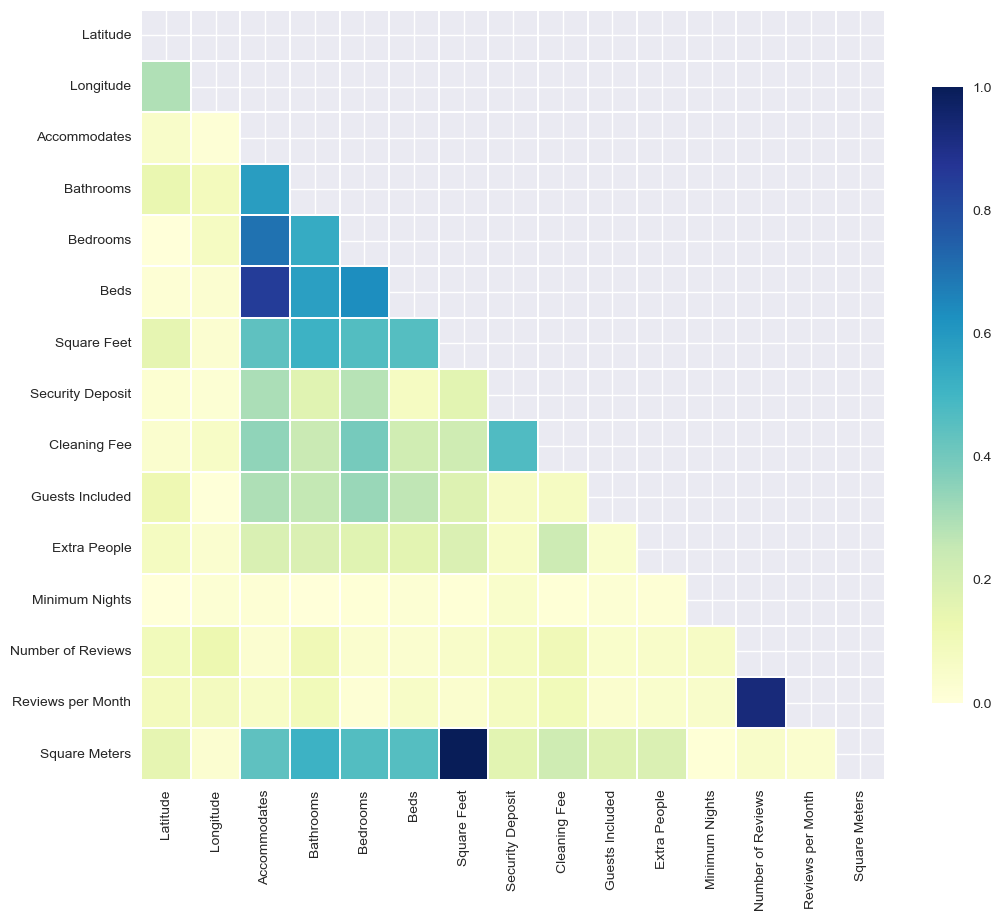

In [73]:
# 2.6.1 Representación gráfica de la correlación

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Madrid_sf_train_corr.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [43]:
# 2.7 - Conversión de los Square Feet en m2

#def sqft_to_m2(superficie):
#    return superficie * 0.092903

#airbnb_Madrid_train['Square Meters'] = sqft_to_m2(airbnb_Madrid_train['Square Feet'])

#airbnb_Madrid_train['Square Meters'].fillna(airbnb_Madrid_train['Square Meters'].mean(), inplace=True)

#airbnb_Madrid_train.head(4)

C:\Users\usuario\AppData\Local\Temp\ipykernel_26736\4243787473.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_train['Square Meters'].fillna(airbnb_Madrid_train['Square Meters'].mean(), inplace=True)


,Street,Neighbourhood,City,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,Square Meters
0,"Madrid, Community of Madrid, Spain",0,Madrid,0,Spain,Apartment,Entire home/apt,4,1.0,1.0,...,374.084309,55.0,100.0,30.0,1,0,1,72,7.63,34.753555
1,"Madrid, Comunidad de Madrid 28017, Spain",0,Madrid,28017,Spain,House,Private room,1,1.0,1.0,...,374.084309,21.0,100.0,30.0,1,0,1,0,1.00,34.753555
2,"Cortes, Madrid, Comunidad de Madrid 28014, Spain",Cortes,Madrid,28014,Spain,Apartment,Entire home/apt,4,1.0,2.0,...,374.084309,110.0,175.0,50.0,4,15,2,58,2.28,34.753555
3,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Madrid,28013,Spain,Apartment,Entire home/apt,2,1.0,0.0,...,374.084309,39.0,100.0,30.0,1,0,2,11,2.97,34.753555


In [ ]:
# 2.8 - Visualizaciones de los principales datos
# 2.8.1 - Histogramas de variables por separado

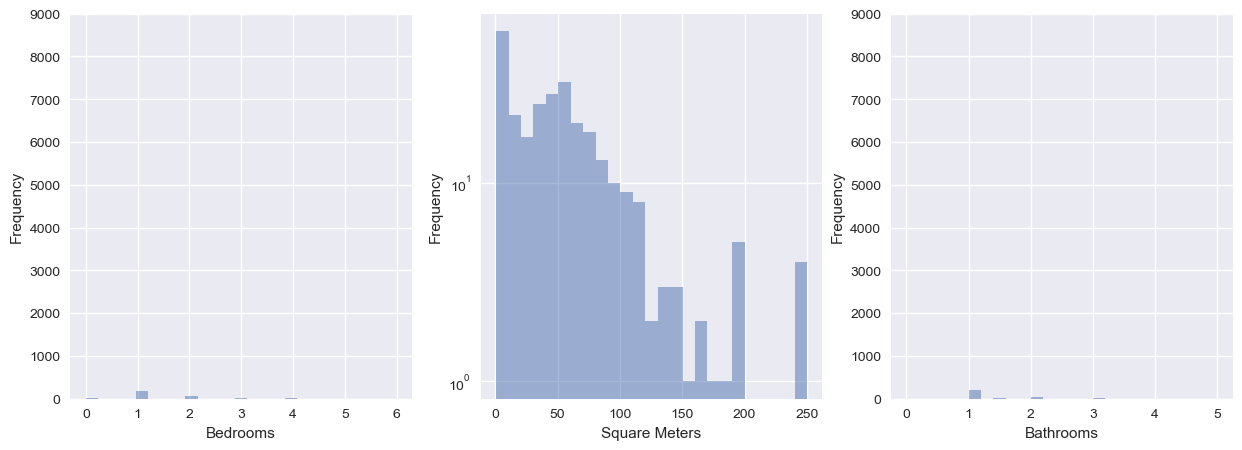

In [75]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_Madrid_sf_train['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 9000)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_Madrid_sf_train['Square Meters'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Square Meters')

plt.subplot(1,3,3)
airbnb_Madrid_sf_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 9000)
plt.xlabel('Bathrooms')

plt.show()

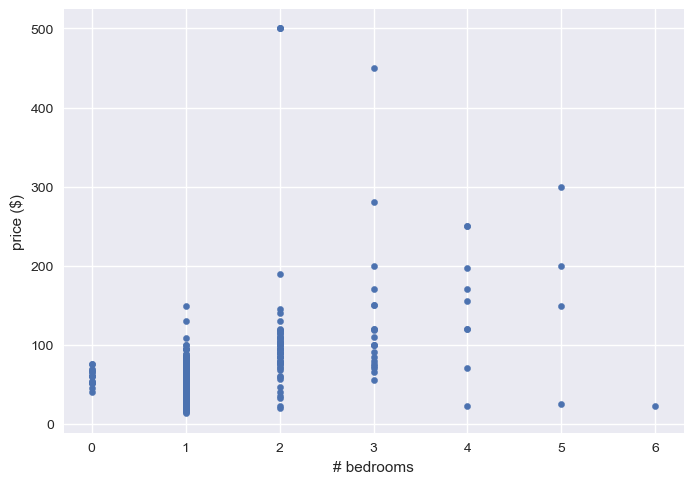

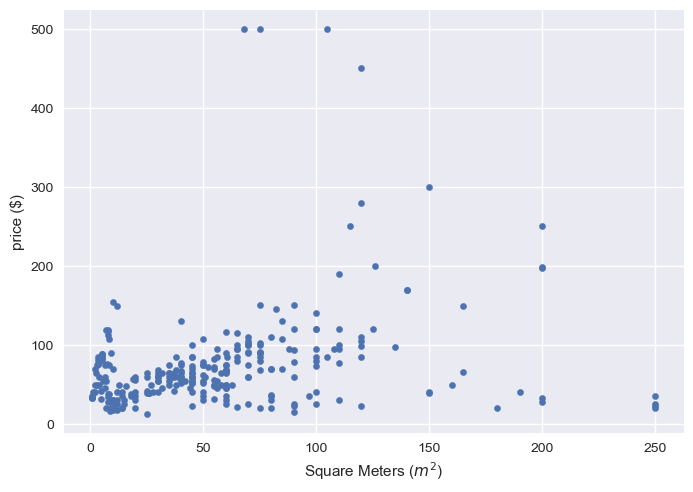

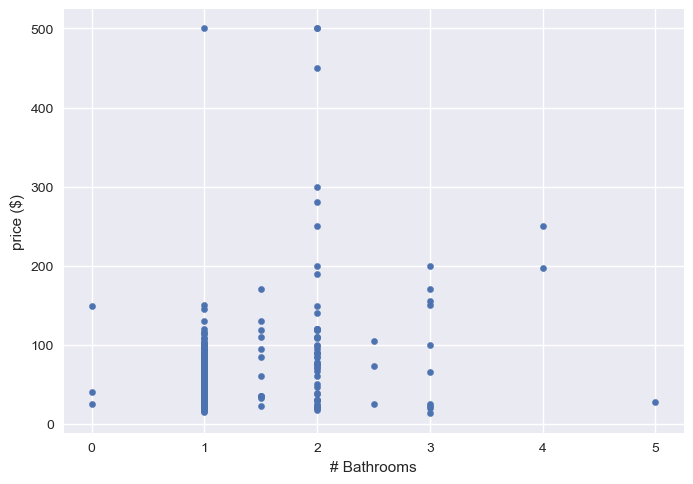

In [77]:
# 2.8.2 - Gráficas del precio en función de las principales características

# Sólo representamos 3: bedrooms, sqm meters y bathrooms
# el resto se puede repetir una a una

airbnb_Madrid_sf_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_sf_train.plot(kind = 'scatter',x='Square Meters',y = 'Price')
plt.xlabel('Square Meters ($m^2$)')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_sf_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()

In [ ]:
# 2.8.3 - Eliminación de Outliers

# Según estas gráficas no hay Outliers, y revisando los máximos de .describe() tampoco parece que lo sean. 

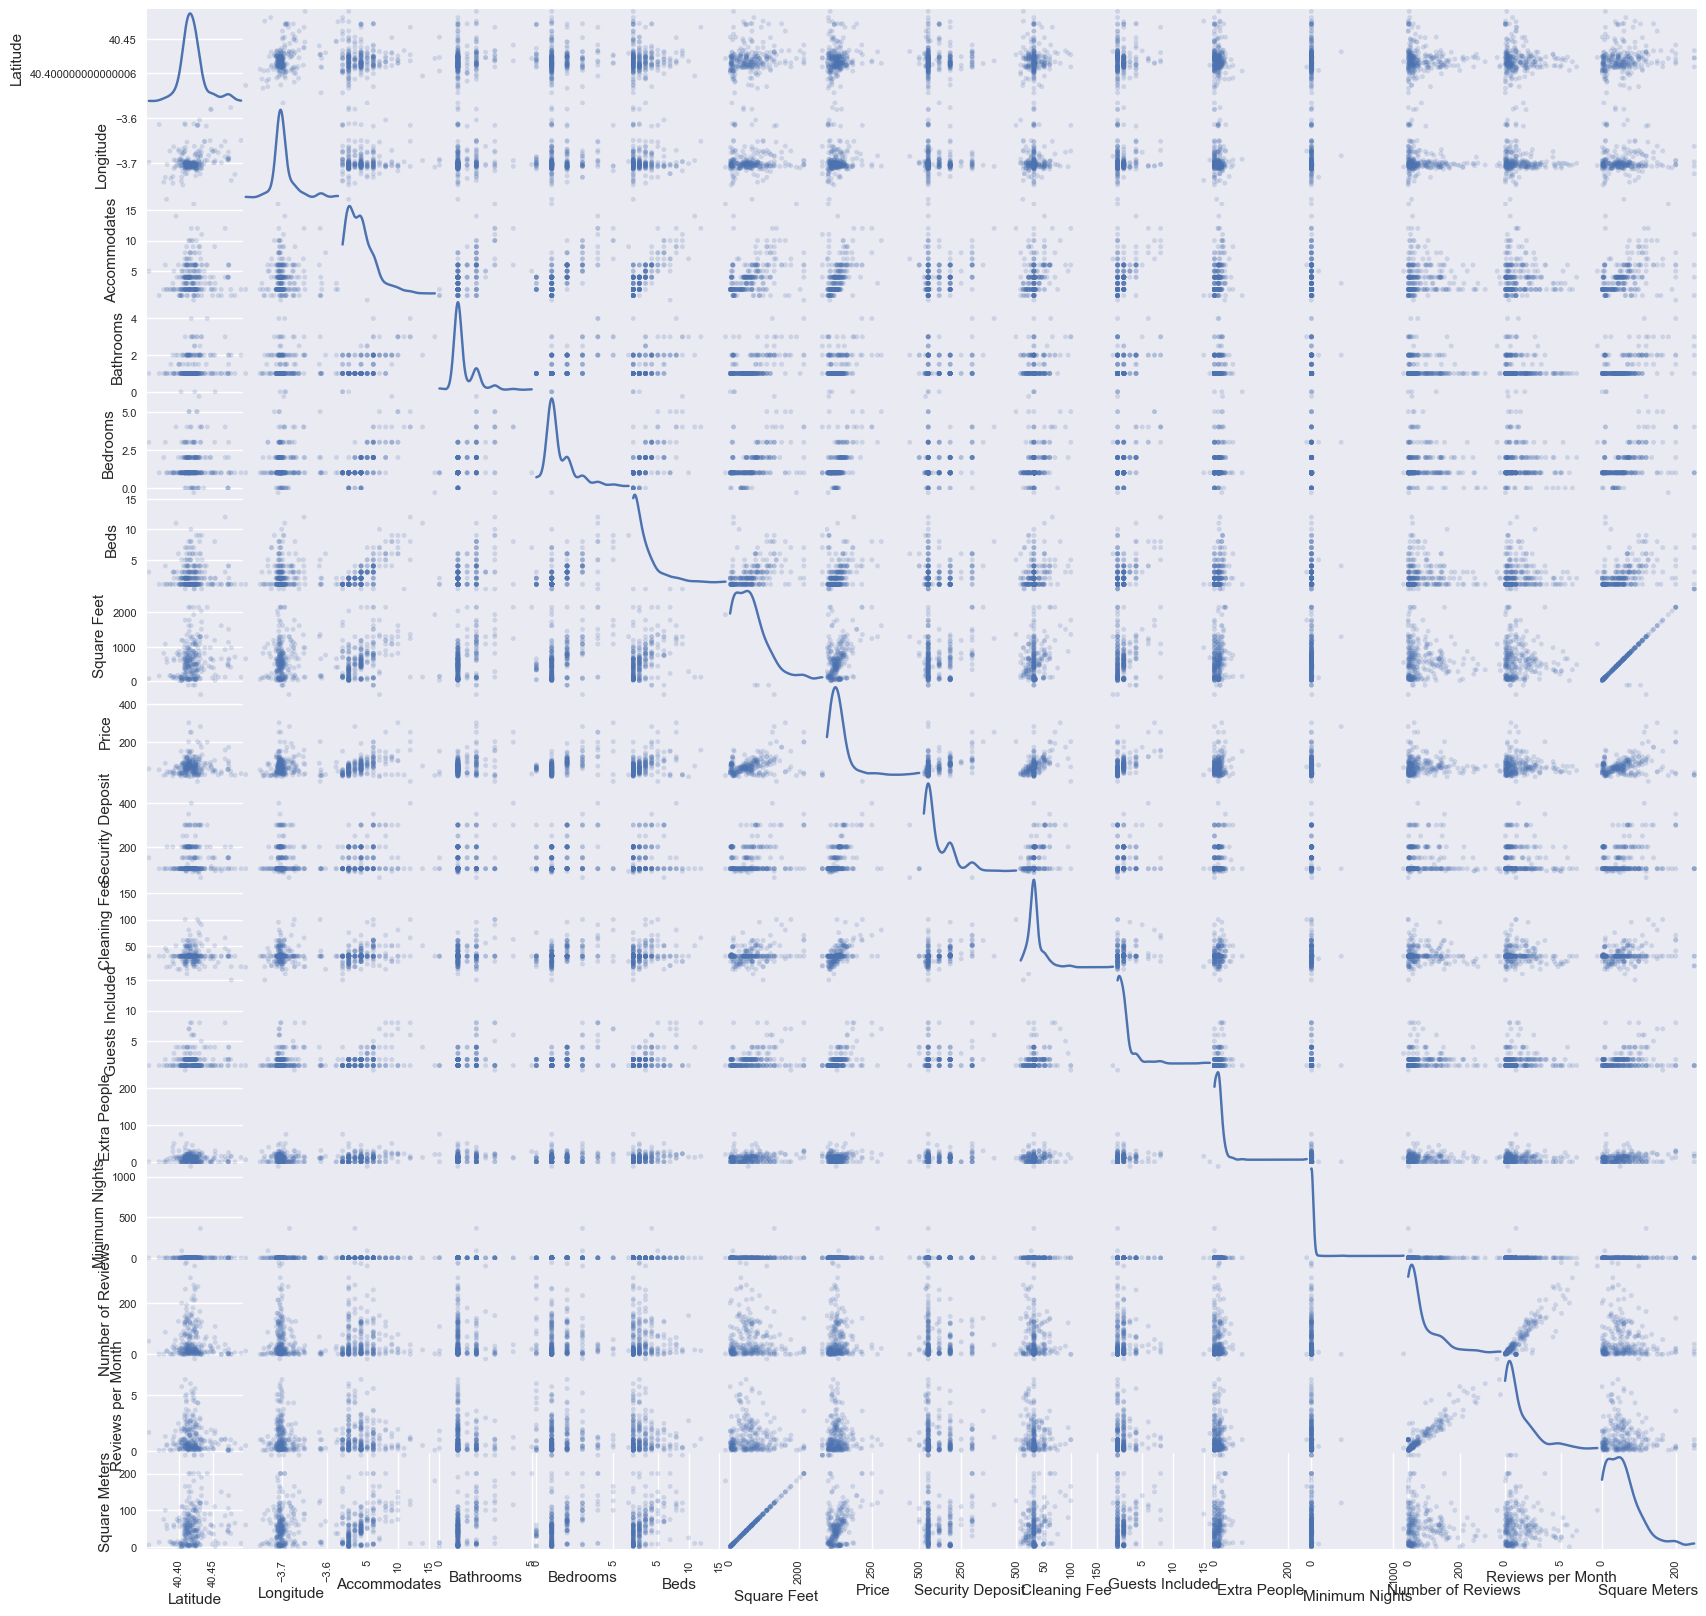

In [79]:
# 2.9 - Representación de todas las variables

pd.plotting.scatter_matrix(airbnb_Madrid_sf_train_corr, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [ ]:
# 3 - Preprocesado
# Hemos eliminado las variables que no son necesarias
# Ahora vamos a estudiar la selección Random Forest / Lasso

In [83]:
# 3.1 - Se cogen los datos de test y se aplican los resultados del análisis hecho en train

airbnb_Madrid_sf_test = pd.read_csv('./airbnb_Madrid_sf_test.csv', sep=';', decimal='.')

# Conversión de square feet en square meters

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

airbnb_Madrid_sf_test['Square Meters'] = sqft_to_m2(airbnb_Madrid_sf_test['Square Feet'])

# Solucionar isnull
airbnb_Madrid_sf_test['Neighbourhood'].fillna('0', inplace=True)
airbnb_Madrid_sf_test['Zipcode'].fillna('0', inplace=True)
airbnb_Madrid_sf_test['Bathrooms'].fillna(airbnb_Madrid_sf_test['Bathrooms'].mode()[0], inplace=True)
airbnb_Madrid_sf_test['Bedrooms'].fillna(airbnb_Madrid_sf_test['Bedrooms'].mode()[0], inplace=True)
airbnb_Madrid_sf_test['Beds'].fillna(airbnb_Madrid_sf_test['Beds'].mode()[0], inplace=True)
airbnb_Madrid_sf_test['Amenities'].fillna('0', inplace=True)
#airbnb_Madrid_test['Square Feet'].fillna(airbnb_Madrid_test['Square Feet'].mean(), inplace=True)
airbnb_Madrid_sf_test['Price'].fillna(airbnb_Madrid_sf_test['Price'].mean(), inplace=True)
airbnb_Madrid_sf_test['Security Deposit'].fillna(airbnb_Madrid_sf_test['Security Deposit'].mode()[0], inplace=True)
airbnb_Madrid_sf_test['Cleaning Fee'].fillna(airbnb_Madrid_sf_test['Cleaning Fee'].mode()[0], inplace=True)
airbnb_Madrid_sf_test['Reviews per Month'].fillna(airbnb_Madrid_sf_test['Reviews per Month'].mode()[0], inplace=True)
#airbnb_Madrid_test['Square Meters'].fillna(airbnb_Madrid_test['Square Meters'].mean(), inplace=True)
airbnb_Madrid_sf_test.isnull().any()







C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\832047343.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_sf_test['Neighbourhood'].fillna('0', inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\832047343.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Street               False
Neighbourhood        False
City                 False
Zipcode              False
Country              False
Latitude             False
Longitude            False
Property Type        False
Room Type            False
Accommodates         False
Bathrooms            False
Bedrooms             False
Beds                 False
Bed Type             False
Amenities            False
Square Feet          False
Price                False
Security Deposit     False
Cleaning Fee         False
Guests Included      False
Extra People         False
Minimum Nights       False
Number of Reviews    False
Reviews per Month    False
Square Meters        False
dtype: bool

In [87]:

# Drop de los datos no correlacionables

airbnb_Madrid_sf_test_corr = airbnb_Madrid_sf_test.drop (['Street', 'Neighbourhood', 'City', 'Zipcode', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1)  
#airbnb_Madrid_train_corr.corr()



# Segmentación de los datos separando variable dependiente de las independientes

X_train = airbnb_Madrid_sf_train_corr.drop(columns=['Price']) 
y_train = airbnb_Madrid_sf_train_corr.Price
X_test = airbnb_Madrid_sf_test_corr.drop(columns=['Price']) 
y_test = airbnb_Madrid_sf_test_corr.Price

print(X_train.isna().sum()) 

Latitude             0
Longitude            0
Accommodates         0
Bathrooms            0
Bedrooms             0
Beds                 0
Square Feet          0
Security Deposit     0
Cleaning Fee         0
Guests Included      0
Extra People         0
Minimum Nights       0
Number of Reviews    0
Reviews per Month    0
Square Meters        0
dtype: int64


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END .......................................

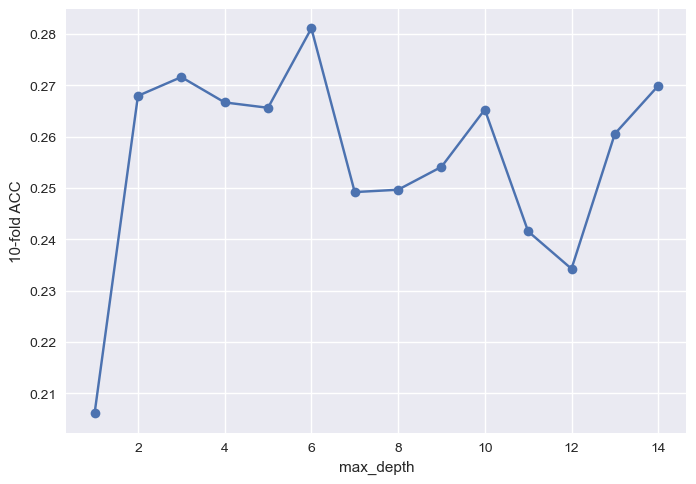

In [89]:
# 3.2 - Aplicación de Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
#print(y_train.isna().sum()) 

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [ ]:
# Vemos que el modelo no es bueno, porque sale un valor de Accuracy de 0,589. Sería bueno si se acercara más a 1. Hay que ajustar

<>:30: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\2062256232.py:30: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(x, y_hat, 'g', label='$\hat{y}$')  # Predicted y-values
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.119e+05, tolerance: 1.191e+02
  model = cd_fast.enet_coordinate_descent(


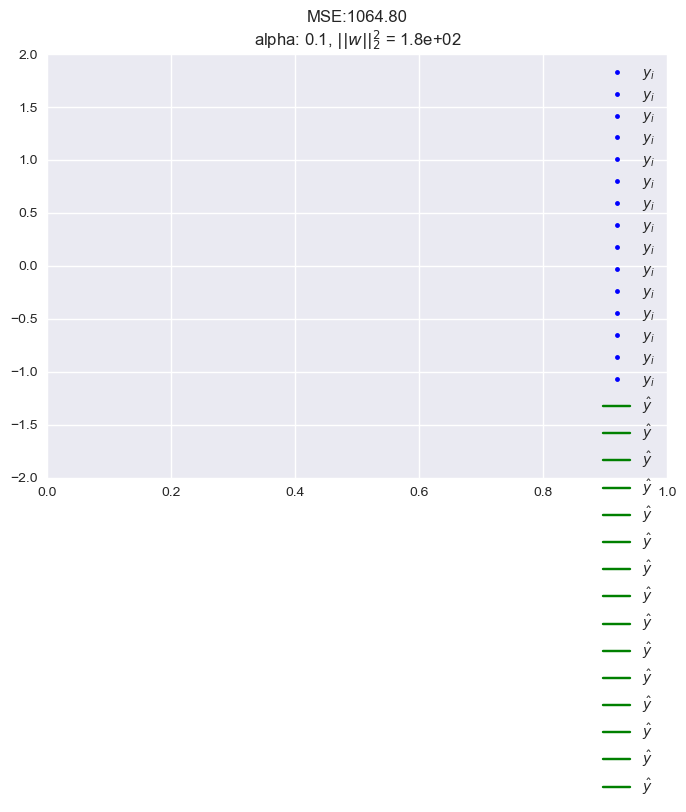

NameError: name 'degree' is not defined

In [95]:
# 3.2 - Aplicación de Lasso

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#model
alpha = 0.1
lasso = Lasso(alpha = alpha).fit(X_train,y_train)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(X_test)

# error
error_test = np.mean(np.power(y_test - y_hat,2)) 


# Definición de variables
x = X_test  # First feature in the test set (if it's univariate)
y_i = y_test  # Actual target values for the test set
#y_hat = model.predict(X_test)  # Predictions from the model for the test set

# g_x can be defined similarly if you are plotting model predictions
#g_x = lasso.predict(x.reshape(-1, 1))  # Model prediction on the test data
g_x = lasso.predict(x)  # Model prediction on the test data

#plt.plot(x, g_x, 'r', label='$y$')  # Model's predicted values
plt.plot(x, y_i, 'b.', label='$y_i$')  # Actual test values
plt.plot(x, y_hat, 'g', label='$\hat{y}$')  # Predicted y-values
#plt.title(f'Grado: {degree}, MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
plt.title(f'MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
plt.legend()
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]

for f,wi in zip(coef_names,w):
    print(f,wi)

In [97]:
# 3.2 - Aplicación de Lasso (de Chat GPT)

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# Crear un modelo Lasso
lasso_model = Lasso(alpha=0.1)  # 'alpha' es el parámetro de regularización (hiperparámetro)

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse:.4f}")

# Ver los coeficientes de las características
print("Coeficientes del modelo Lasso:", lasso_model.coef_)

# Ver las características seleccionadas (coeficientes diferentes de cero)
selected_features = X_test.columns[lasso_model.coef_ != 0]
print("Características seleccionadas por el modelo Lasso:", selected_features)

Error cuadrático medio (MSE) en el conjunto de prueba: 1064.8011
Coeficientes del modelo Lasso: [ 0.         -0.          3.12264998 -2.92012821  9.67057507 -0.
  0.01493495  0.07714748  1.38904837  6.82001348 -0.38664523  0.04015
 -0.06862817  3.90823308 -0.09475802]
Características seleccionadas por el modelo Lasso: Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Square Feet',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Number of Reviews', 'Reviews per Month',
       'Square Meters'],
      dtype='object')


C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.119e+05, tolerance: 1.191e+02
  model = cd_fast.enet_coordinate_descent(


<>:45: SyntaxWarning: invalid escape sequence '\h'
<>:45: SyntaxWarning: invalid escape sequence '\h'
C:\Users\usuario\AppData\Local\Temp\ipykernel_24544\775021014.py:45: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(x_i,y_hat,'g',label='$\hat{y}$')


(282, 10)
(282,)
(32, 10)
(32,)


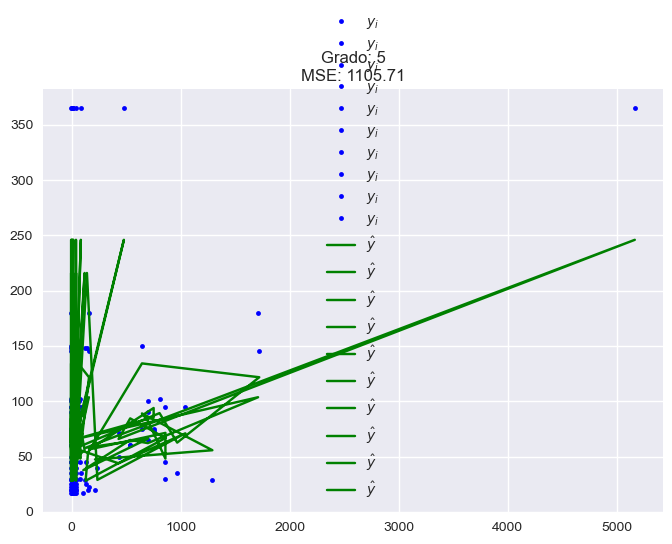

w0:  -6438.3819489865045
w1:  153.6519824700041
w2:  -60.757195069646535
w3:  4.4424172093261625
w4:  -2.913553990632027
w5:  14.373795031258272

||w||_2^2 = 2.8e+04


In [105]:
# 3.3 - Aplicación de un modelo base (simple) de regresión lineal con las variables, escojo m2, bedrooms, Accomodates, Bathrooms, Cleaning Fee, minimum nights
# para comparar el error MSE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

degree = 5

# features
poly = PolynomialFeatures(degree) # generamos x^j
X_train_RL = X_train.drop(columns=['Security Deposit', 'Guests Included', 'Extra People', 'Number of Reviews', 'Reviews per Month'])

y_train_RL = y_train

X_test_RL = X_test.drop(columns=['Security Deposit', 'Guests Included', 'Extra People', 'Number of Reviews', 'Reviews per Month'])

y_test_RL = y_test

# Pintar dimensiones de los 4
print(X_train_RL.shape)
print(y_train_RL.shape)
print(X_test_RL.shape)
print(y_test_RL.shape)


# pista: como siempre, instanciar el modelo y .fit()
lr = LinearRegression().fit(X_train_RL, y_train_RL)

# predicción
y_hat = lr.predict(X_test_RL)

# Cálculo del error
mse = np.mean((y_test_RL-y_hat)**2)

# Identificación de variables
x = X_train_RL
g_x = y_train_RL
x_i = X_test_RL
y_i = y_test_RL

# Representación gráfica

#plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x_i,y_hat,'g',label='$\hat{y}$')
plt.title(f'Grado: {degree}\nMSE: {mse:.2f}')
plt.legend()
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
plt.show()

# Mostramos los coeficientes del modelo
print('w0: ', lr.intercept_)

w = lr.coef_
norm_w2 = np.dot(w,w.T) # no se tiene en cuenta el intercepto

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]
for f,wi in zip(coef_names,w):
    print(f,wi)

print(f'\n||w||_2^2 = {norm_w2:.2g}')





In [131]:
X_train.head()


,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,Square Meters
0,4,1.0,1.0,2.0,396.217391,100.0,30.0,1,0,3,0,1.00,36.8098
1,2,1.0,1.0,1.0,396.217391,100.0,30.0,1,10,1,0,1.00,36.8098
2,4,1.0,1.0,2.0,396.217391,100.0,25.0,2,7,2,12,3.21,36.8098
3,4,1.0,0.0,2.0,396.217391,100.0,30.0,2,15,1,87,3.09,36.8098
4,2,2.0,1.0,1.0,396.217391,100.0,30.0,1,15,1,3,0.99,36.8098


In [133]:
X_test.head()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,Square Meters
0,4,1.0,1.0,2.0,396.217391,100.0,30.0,1,0,3,0,1.00,36.8098
1,2,1.0,1.0,1.0,396.217391,100.0,30.0,1,10,1,0,1.00,36.8098
2,4,1.0,1.0,2.0,396.217391,100.0,25.0,2,7,2,12,3.21,36.8098
3,4,1.0,0.0,2.0,396.217391,100.0,30.0,2,15,1,87,3.09,36.8098
4,2,2.0,1.0,1.0,396.217391,100.0,30.0,1,15,1,3,0.99,36.8098


In [107]:
# 4 - Aplicación de cross-validation manualmente

from sklearn.model_selection import KFold

# Crear el objeto KFold
kf = KFold(n_splits=5)

# Iterar sobre los splits y entrenar/validar el modelo
scores = []
for train_index, test_index in kf.split(X_train):
    X_train_CV, X_test_CV = X_train[train_index], X_test[test_index]
    y_train_CV, y_test_CV = y_train[train_index], y_test[test_index]
    
    # Entrenar el modelo
    model.fit(X_train_CV, y_train_CV)
    
    # Evaluar el modelo
    score = model.score(X_test_CV, y_test_CV)
    scores.append(score)

print("Scores de cada fold: ", scores)
print("Promedio de la validación cruzada: ", sum(scores)/len(scores))

KeyError: "None of [Index([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,\n       ...\n       272, 273, 274, 275, 276, 277, 278, 279, 280, 281],\n      dtype='int32', length=225)] are in the [columns]"